In [31]:
from scGCO import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scanpy as sc

In [4]:
adata=sc.read('../../data/processed_adata/adata_msbrain_3rep_withclusters.h5ad')

In [5]:
adata1=adata[adata.obs['replicate']=='1']

matrix([[0.       , 4.6764016, 0.       , ..., 0.       , 6.278362 ,
         0.       ],
        [0.       , 5.121978 , 0.       , ..., 0.       , 5.121978 ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 6.2677994,
         0.       ],
        ...,
        [5.1386857, 5.4734807, 0.       , ..., 0.       , 0.       ,
         0.       ],
        [4.7194905, 4.0352235, 0.       , ..., 0.       , 0.       ,
         0.       ],
        [5.121978 , 4.6151204, 0.       , ..., 0.       , 3.5361168,
         4.9003243]], dtype=float32)

In [26]:
data_norm=pd.DataFrame(adata1.X.todense(),columns=adata1.var.index)
locs=np.array(adata1.obs.loc[:,['x_centroid','y_centroid']])

In [27]:
exp= data_norm.iloc[:,0]
cellGraph= create_graph_with_weight(locs, exp)

Text(0.5, 1.0, 'CellGraph')

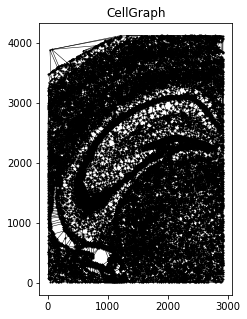

In [28]:
fig, ax= plt.subplots(1,1,figsize=(5,5)) #, dpi=300)
ax.set_aspect('equal')

exp= data_norm.iloc[:,0].values
cellGraph = create_graph_with_weight(locs, exp)
ax.scatter(locs[:,0], locs[:,1], s=1, color='black')
for i in np.arange(cellGraph.shape[0]):
    x = (locs[int(cellGraph[i,0]), 0], locs[int(cellGraph[i,1]), 0]) 
    y = (locs[int(cellGraph[i,0]), 1], locs[int(cellGraph[i,1]), 1])     
    ax.plot(x, y, color='black', linewidth=0.5)
    
plt.title('CellGraph')

Gene expression classification via Gaussian mixture modeling

In [ ]:
t0=time.time()
gmmDict= multiGMM(data_norm)
print('GMM time(s): ', time.time()-t0)

scGCO used 7 out of 12 cores


  0%|                                                                                             | 0/7 [00:00<?, ?it/s]

Run the main scGCO function to identify genes with a non-random spatial variability

In [ ]:
t0= time.time()
result_df= identify_spatial_genes(locs, data_norm,cellGraph,gmmDict)
print('Running time: {} seconds'.format(time.time()-t0))

The results of scGCO can be saved to .csv files using write_result_to_csv function.

And the saved .csv file can be accessed using read_result_to_dataframe function.

In [ ]:
result_df=read_result_to_dataframe('../../figures/tables/scGCO_svg_scores_msbrain1.csv')
print(result_df.shape)